In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!unzip -qq "/content/drive/MyDrive/spectograms.zip"

In [6]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [8]:
DIR = "/content/spectograms"
l = [0,1,2,3,4,5,6,7,8,9]
IMG_SIZE = 255 # Declare image size
spects = []

# Find and read each image through running on each folder
for category in l: 
    path = os.path.join(DIR, str(category)) # Find the path of each folder
    dirs = os.listdir(path) # Wander each folder
    for img in dirs:
        grayscaled_image = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Grayscaling transformation
        norm_image = cv2.normalize(grayscaled_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) # Normalization
        processed_image = cv2.resize(norm_image,(IMG_SIZE, IMG_SIZE)) # resizing 
        spects.append([processed_image, str(category)]) # Append preprocessed image and its label

len(spects)

8732

In [9]:
X = [] # Verisetindeki özniteliklerin sınıflarından ayrılmış bir biçimde tutulması
y = [] # Verisetindeki sınıfların tutulması
for feature, label in spects:
    X.append(feature)
    y.append(label)

In [10]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.11)

import keras
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test =  keras.utils.np_utils.to_categorical(y_test)
y_val =   keras.utils.np_utils.to_categorical(y_val)


In [11]:
print(f"Shape of training set: {X_train.shape}")

Shape of training set: (6993, 255, 255)


In [12]:

model = tf.keras.Sequential()
  
model.add(tf.keras.layers.Conv2D(96, kernel_size = (3,3), input_shape = (255,255,1), strides = (4,4), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = (2,2)))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

In [15]:
print(f"X train type {type(X_train)} y train type {type(y_train)} X_test type {type(X_test)} y_test {type(y_test)} X_val {type(X_val)} y_val {type(y_val)}")

X train type <class 'numpy.ndarray'> y train type <class 'numpy.ndarray'> X_test type <class 'numpy.ndarray'> y_test <class 'numpy.ndarray'> X_val <class 'numpy.ndarray'> y_val <class 'numpy.ndarray'>


In [16]:
results = model.fit(X_train,y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val,y_val))

Epoch 1/50
55/55 [==============================] - 30s 302ms/step - loss: 7.2304 - accuracy: 0.2680 - val_loss: 27.5303 - val_accuracy: 0.1075
Epoch 2/50
55/55 [==============================] - 9s 173ms/step - loss: 1.8412 - accuracy: 0.3433 - val_loss: 30.0961 - val_accuracy: 0.1087
Epoch 3/50
55/55 [==============================] - 10s 173ms/step - loss: 1.7375 - accuracy: 0.3691 - val_loss: 36.3932 - val_accuracy: 0.1087
Epoch 4/50
55/55 [==============================] - 10s 176ms/step - loss: 1.6854 - accuracy: 0.3915 - val_loss: 23.1149 - val_accuracy: 0.0867
Epoch 5/50
55/55 [==============================] - 10s 177ms/step - loss: 1.6396 - accuracy: 0.4077 - val_loss: 20.1470 - val_accuracy: 0.1087
Epoch 6/50
55/55 [==============================] - 10s 179ms/step - loss: 1.5811 - accuracy: 0.4402 - val_loss: 15.0453 - val_accuracy: 0.0775
Epoch 7/50
55/55 [==============================] - 10s 180ms/step - loss: 1.5228 - accuracy: 0.4575 - val_loss: 12.2852 - val_accuracy: 

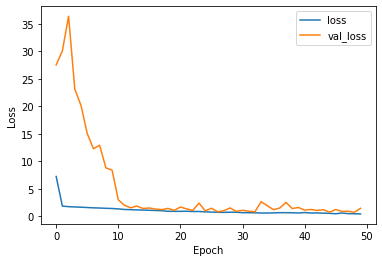

In [17]:
import matplotlib.pyplot as plt
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

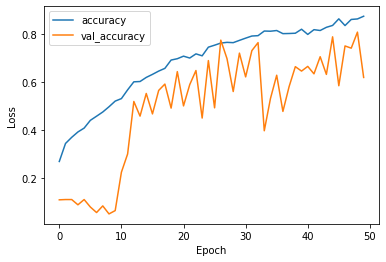

In [18]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [19]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 2s 34ms/step - loss: 1.5089 - accuracy: 0.6259


[1.508872151374817, 0.6258581280708313]